In [18]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline  # 有了 %matplotlib inline 就可以省略 plt.show()

# 設定中文字型及負號正確顯示
plt.rcParams["font.sans-serif"] = "Microsoft JhengHei"
plt.rcParams["axes.unicode_minus"] = False

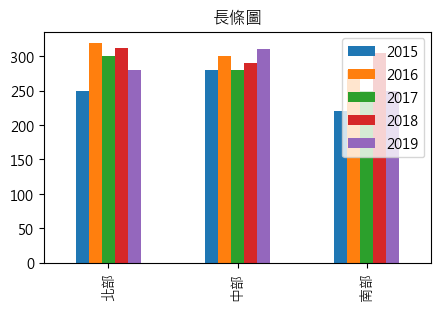

In [19]:
df = pd.DataFrame([[250, 320, 300, 312, 280],
                   [280, 300, 280, 290, 310],
                   [220, 280, 250, 305, 250]],
                   index=['北部','中部','南部'],
                   columns=[2015, 2016, 2017, 2018, 2019])

g1 = df.plot(kind='bar', title='長條圖', figsize=[5, 3])

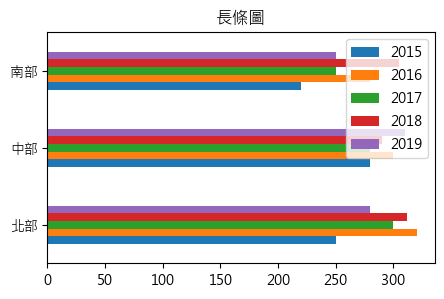

In [20]:
g2 = df.plot(kind='barh', title='長條圖', figsize=[5, 3])

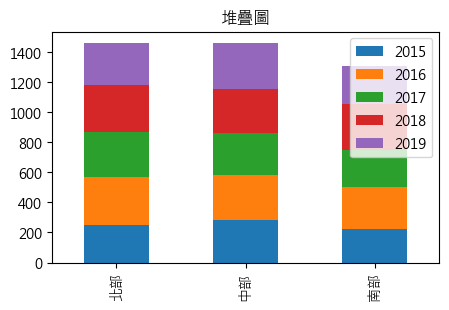

In [21]:
g1 = df.plot(kind='bar', stacked=True, title='堆疊圖', figsize=[5, 3])

In [22]:
df

,2015,2016,2017,2018,2019
北部,250,320,300,312,280
中部,280,300,280,290,310
南部,220,280,250,305,250


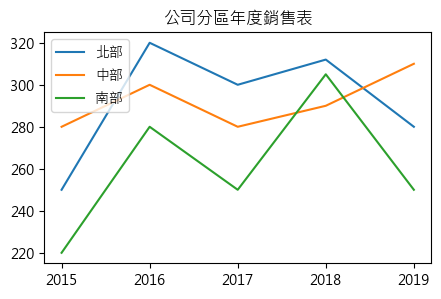

In [31]:
g1 = df.iloc[0].plot(kind='line', legend=True, xticks=range(2015, 2020),title='公司分區年度銷售表', figsize=[5, 3])
g2 = df.iloc[1].plot(kind='line', legend=True, xticks=range(2015, 2020))
g3 = df.iloc[2].plot(kind='line', legend=True, xticks=range(2015, 2020))

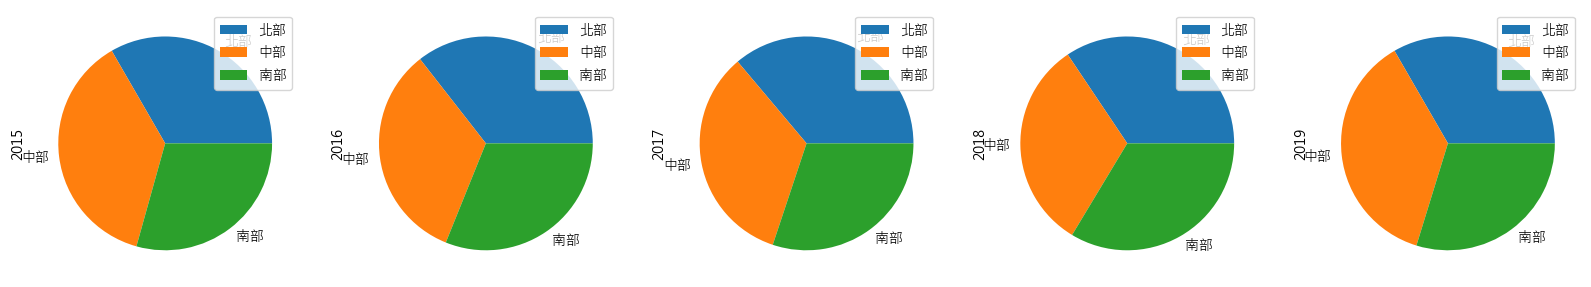

In [29]:
g1 = df.plot(kind='pie', subplots=True, figsize=[20, 20])

* pandas 資料清洗
    1. isnull() => 空值
    2. fillna() => 空欄填值

In [32]:
import pandas as pd
df = pd.read_csv('customer.csv')
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [34]:
df.isnull()

,id,name,gender,age,area,job
0,False,False,False,False,False,False
1,False,False,True,True,False,False
2,False,False,True,True,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,True,True,True,False
7,False,False,True,False,True,False
8,False,False,True,False,True,False
9,False,False,True,False,False,False


In [33]:
df.isnull().sum()

id        0
name      0
gender    8
age       3
area      3
job       0
dtype: int64

In [35]:
# axis=0 => 欄位
df.isnull().any(axis=0).sum()

3

In [37]:
# axis=1 => row
df.isnull().any(axis=1).sum()

8

In [39]:
df[df['age'].isnull()]

,id,name,gender,age,area,job
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產


In [40]:
df[df['gender'].isnull()]

,id,name,gender,age,area,job
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產
10,1700010,彭郁翔,NaN,55.0,基隆市中正區,住宿和餐飲業
13,1700013,郭信邦,NaN,48.0,新北市三重區,教育體育文化


In [49]:
df_sample = df.copy()

# null 值補0
df_sample['age'] = df_sample['age'].fillna(value=0)
df_sample

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,0.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,0.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,0.0,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [50]:
df_sample = df.copy()
print(f'age 的 mean 為 {df_sample["age"].mean()}')

# null 補平均值
df_sample['age'] = df_sample['age'].fillna(value=df_sample['age'].mean())
df_sample

age 的 mean 為 45.0


,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,45.0,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,45.0,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,45.0,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


In [52]:
df_sample = df.copy()
df_sample['gender'] = df_sample['gender'].fillna(method='ffill')
df_sample

C:\Users\user\AppData\Local\Temp\ipykernel_22496\2439756699.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sample['gender'] = df_sample['gender'].fillna(method='ffill')


,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,Male,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Male,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,Male,NaN,NaN,金融業和房地產
7,1700007,吳景翔,Male,39.0,NaN,農林牧漁業
8,1700008,邱孝信,Male,39.0,NaN,金融業和房地產
9,1700009,陳明輝,Male,57.0,基隆市中正區,金融業和房地產


In [53]:
df_sample = df.copy()
df_sample['gender'] = df_sample['gender'].fillna(method='bfill')
df_sample

C:\Users\user\AppData\Local\Temp\ipykernel_22496\2178558929.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sample['gender'] = df_sample['gender'].fillna(method='bfill')


,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,Female,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,Female,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,Female,NaN,NaN,金融業和房地產
7,1700007,吳景翔,Female,39.0,NaN,農林牧漁業
8,1700008,邱孝信,Female,39.0,NaN,金融業和房地產
9,1700009,陳明輝,Female,57.0,基隆市中正區,金融業和房地產


In [54]:
df_sample = df.copy()
df

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


* 去除重複資料
    
    drop_duplicates(subset=欄位, keep=保留選項, inplace=是否更新)

In [55]:
df_sample.drop_duplicates(subset='id', keep='first', inplace=True)
df_sample

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業 和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育 文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿 和 餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產
10,1700010,彭郁翔,NaN,55.0,基隆市中正區,住宿和餐飲業


In [70]:
# 去除欄位中的空白
df_sample = df.copy()

# 去除兩方的空白
# df_sample['job'] = df_sample['job'].str.strip()
df_sample['job'] = df_sample['job'].str.replace(' ', '')
df_sample

,id,name,gender,age,area,job
0,1700001,李國發,Male,21.0,新北市三重區,金融業和房地產
1,1700002,吳俊諺,NaN,NaN,臺北市文山區,金融業和房地產
2,1700003,蔡俊毅,NaN,NaN,臺北市文山區,教育體育文化
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
5,1700005,袁劭彥,Male,42.0,臺北市文山區,金融業和房地產
6,1700006,蔡登意,NaN,NaN,NaN,金融業和房地產
7,1700007,吳景翔,NaN,39.0,NaN,農林牧漁業
8,1700008,邱孝信,NaN,39.0,NaN,金融業和房地產
9,1700009,陳明輝,NaN,57.0,基隆市中正區,金融業和房地產


* 欄位中有幾種不同的類別
    => unique()

In [57]:
df_sample['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [58]:
df_sample['job'].unique()

array(['金融業和房地產', '教育體育文化', '住宿和餐飲業', '農林牧漁業'], dtype=object)

In [71]:
df_sample[df_sample['gender'] == 'Female']

,id,name,gender,age,area,job
3,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
4,1700004,姚鈺迪,Female,34.0,基隆市中正區,住宿和餐飲業
11,1700011,許合蓉,Female,61.0,新北市三重區,住宿和餐飲業
14,1700014,周聿綠,Female,57.0,基隆市中正區,金融業和房地產


In [72]:
df_sample[(df_sample['gender'] == 'Male') & (df_sample['age'] > 50)]

,id,name,gender,age,area,job
12,1700012,武家豪,Male,53.0,新北市三重區,農林牧漁業


In [77]:
df_sample.groupby('gender')['age'].mean()

gender
Female    46.500000
Male      38.666667
Name: age, dtype: float64

In [79]:
df_sample.groupby('gender')['age'].agg(['mean', 'max', 'min'])

,mean,max,min
gender,,,
Female,46.500000,61.0,34.0
Male,38.666667,53.0,21.0
